In [7]:
suppressMessages({

library(data.table, quietly = TRUE)
library(plyr, quietly = TRUE)
library(doParallel,quietly = TRUE)
library(tidyverse, quietly = TRUE)
library("stringr", quietly = TRUE)
library("reactome.db")
library("AnnotationHub")
library("org.Hs.eg.db")
library("AnnotationDbi")
library("ReactomePA")
library("EnsDb.Hsapiens.v86")
library("clusterProfiler")
library("DOSE")
library(msigdbr)
library(rtracklayer)
})

cores <- detectCores()
cores
registerDoParallel(cores=cores)
options(future.globals.maxSize = Inf)

suppressMessages({
    
library("SummarizedExperiment")
library("ReportingTools")
library("EnrichmentBrowser")
library(stringr)
library(dplyr)
library(tidyr)
library(pathfindR)
library(GenomicRanges)
library(Gviz)
library(regioneR)  
library("TxDb.Hsapiens.UCSC.hg38.knownGene")
})

[1] 10

In [ ]:
# There are three other analyses that we can do :

# 1. Network reconstruction and Active Network oriented Enrichment Analysis
# 2. TF motif enrichment (I have used HOMER)
# 3. Genome-wide visualization of the promoters of the liver-specific genes, 
# asking the question on whether we can identify clusters of liver specific gene expression.    

In [10]:
a = read.table("df4.pc.samples.of.interest.txt.liver.specific.genes.txt", header=T, sep="\t", stringsAsFactors=F)
head(a,2)
name = basename("df4.pc.samples.of.interest.txt.liver.specific.genes.txt")

GENES = a$gene
length(GENES)

x = rtracklayer::import("df4.pc.samples.of.interest.txt.liver.specific.genes.txt.liver.specific.genes.TSS.bed")
class(x)

,median_tpm_Liver,median_tpm_Other,LO,gene
,<dbl>,<dbl>,<dbl>,<chr>
1,28.935,20.460,1.414223,ISG15
2,5.877,4.422,1.329037,SCNN1D


[1] 1938

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [11]:
# 1. Network reconstruction and Active Network oriented Enrichment Analysis

In [12]:

cat(paste0('Active-subnetwork-oriented Enrichment Analysis : we are not able to use several packages such as 
pathfindR or enrichmentBrowser that identifies active subnetworks, given the fact that we do not have 
p-values that are associated with liver-specific genes.
EnrichmentBrowser implements many gene graph enrichment analysis methods such as 
GGEA, SPIA, PATHNET, DEGRAPH, TOPOLOGYGSA, GANPA, CEPA. NETGSA'))


Active-subnetwork-oriented Enrichment Analysis : we are not able to use several packages such as 
pathfindR or enrichmentBrowser that identifies active subnetworks, given the fact that we do not have 
p-values that are associated with liver-specific genes.
EnrichmentBrowser implements many gene graph enrichment analysis methods such as 
GGEA, SPIA, PATHNET, DEGRAPH, TOPOLOGYGSA, GANPA, CEPA. NETGSA

In [13]:
cat(paste0('The visualization of the network that connects the liver specific genes can be achieved by using RCy3 ; 
the liver specific genes can be network-built by using other packages such as GeneNetworkBuilder.'))

The visualization of the network that connects the liver specific genes can be achieved by using RCy3 ; 
the liver specific genes can be network-built by using other packages such as GeneNetworkBuilder.

In [14]:
# 2. TF motif enrichment (I have used HOMER) : the results are described in a file that is : 
# A_slide_TF_enrichment_in _TSS_of_liver_specific_genes.pd

In [15]:
# 3. Genome-wide visualization of the promoters of the liver-specific genes, 
# asking the question on whether we can identify clusters of liver specific gene expression.  

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

Warning message in plotTracks(list(gtrack, atrack, grtrack)):
"The track chromosomes in 'trackList' differ. Setting all tracks to chromosome 'chr1'"


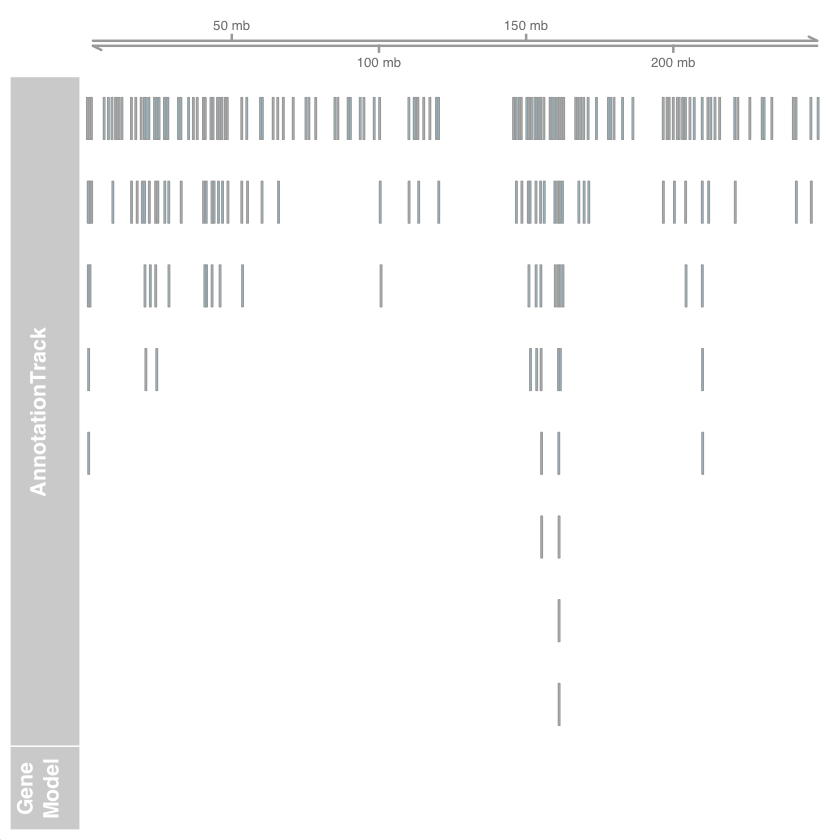

In [16]:
# For visualization in GVIZ I have converted the TSS coordinates from hg38 to hg19
# geneModels provides the annotations on hg19

x.hg19 = rtracklayer::import("df4.pc.samples.of.interest.txt.liver.specific.genes.txt.liver.specific.genes.TSS.hg19.bed")
class(x.hg19)

data(geneModels)
data(cpgIslands)

chr <- as.character(unique(seqnames(cpgIslands)))
gen <- genome(cpgIslands)
grtrack <- GeneRegionTrack(geneModels, genome = gen,
                           chromosome = chr, name = "Gene Model")

atrack = AnnotationTrack(x.hg19)
gtrack = GenomeAxisTrack()

# itrack = IdeogramTrack(genome = gen, chromosome = chr)
# plotTracks(list(gtrack, atrack, itrack, grtrack), chromosome = "chr21", from = 10000000, to = 20000000)

plotTracks(list(gtrack, atrack, grtrack))